#### FIFA Data Analysis: Problem Statement
    
##### Context

In this project, we will be looking at FIFA's player data, which contains information
such as personal details, wages, physical attributes, technical skills, potential, and
positional strengths. This is preliminary data of FIFA 2018. Through this project,
you will get a glimpse of insights into the beautiful game and the decisions a
football manager goes through.

##### Objective

Preliminary Data Analysis. Explore the dataset and practice extracting basic
observations about the data using any data analytical tools you are most
comfortable with.

You are expected to:
- Come up with the players' profiles (characteristics of a player) of the
different teams/countries.
- Generate a set of insights and recommendations that will help the coach to
understand the competition.

You are expected to perform the analysis to answer the following questions:

1. Prepare a rank-ordered list of the top 10 countries with the most players. List 5
countries that are producing the most numbers of footballers that play at this
level?

2. Interpret the age after which a player stops improving.

3. Which type of offensive player tends to get paid the most: the striker, the rightwinger, or the left-winger? Visualize through a scatter plot for all three.

4. Top 5 players for every preferred position in terms of overall as well as
potential points. Who was the best in 2018?

5. Which club(s) has the maximum share of players from England? Which club(s)
has the maximum share of players from Spain? Which club(s) have the maximum
share of players from Germany?

6. As a National coach of the France team, you want to compare the national
team of England, Spain, Italy, and Germany to understand the competition. The
formation of the teams is restricted to 4-3-3 (4 defenders, 3 midfielders, 3
forwards, 1 Goal Keeper) and players with an overall value of more than 75 are
preferred, now form the best team for each of the mentioned countries and
compare them. Note down all the insights that you as a business analyst should
share with the coach.

In [1]:
#import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#To set number of rows and columns to be displayed
pd.set_option('display.max_columns', 74)
pd.set_option('display.max_row', 200)

In [3]:
#load the data
players= pd.read_csv(r"C:\Users\User\Downloads\FIFA.xlsx - CompleteDataset.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_8632\1334554156.py:2: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  players= pd.read_csv(r"C:\Users\User\Downloads\FIFA.xlsx - CompleteDataset.csv")


To answer the questions above proper understating of the data is required. This will entails carrying out the following;
- Pre-processing of the data
- Randomly check the featrues in the datasets
- Check for the datatypes and convert it where needed
- Check for missing values and treat as appropriate
- Check for missing values
- Visualize some of the features in the dataset

In [4]:
#check the first ten rows of the dataset
players.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5M,565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105M,565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123M,280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97M,510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61M,230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92M,355K,2143,79,80,78,80,89,87,62,77,85,91,84,15,6,12,8,10,85,39,84,65,83,25,81,91,91,83,88,19,83,79,42,84,78,87,84.0,57.0,62.0,87.0,78.0,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,ST,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,64.5M,215K,1458,57,38,60,43,42,64,17,21,18,13,19,90,85,87,86,90,21,30,67,51,12,13,40,12,88,50,31,13,58,40,21,64,68,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,90.5M,295K,2096,93,54,93,91,92,87,80,82,93,83,79,11,12,6,8,8,57,41,59,81,82,25,86,85,85,86,79,22,87,79,27,65,86,79,88.0,47.0,61.0,87.0,81.0,88.0,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,LW,88.0,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa

In [5]:
#list the columns of the datasets
players.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')>

In [6]:
#Check the dimension of the datasets
players.shape

(17981, 74)

We have 17981 rows and 74 columns in the datasets

In [7]:
#check the info of the dataset
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [8]:
#check the statistical analysis of the datasets for the numerical values
players.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,17981.0,NaN,NaN,NaN,8990.0,5190.811931,0.0,4495.0,8990.0,13485.0,17980.0
Name,17981,16975,J. RodrÃ­guez,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,17981.0,NaN,NaN,NaN,25.144541,4.614272,16.0,21.0,25.0,28.0,47.0
Photo,17981,17929,https://cdn.sofifa.org/48/18/players/212198.png,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,17981,165,England,1630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flag,17981,165,https://cdn.sofifa.org/flags/14.png,1630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall,17981.0,NaN,NaN,NaN,66.247984,6.987965,46.0,62.0,66.0,71.0,94.0
Potential,17981.0,NaN,NaN,NaN,71.190813,6.102199,46.0,67.0,71.0,75.0,94.0
Club,17733,647,Villarreal CF,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club Logo,17981,679,https://cdn.sofifa.org/24/18/teams/483.png,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are 647 clubs
- 16,975 names of players
- 165 nationalities
- 802 preferred posotions
- 15 positions
- age ranges from 16.0	to	47.0
- Overall rating ranges from 46.0 to 94.0
- Potential rating ranges from 46.0 to 	94.0
- Value ranges from 0.01 to 123.0
- Wages ranges from 1.0	to 565.0
- Engalnd is the nationality that occur more
- Villareal CF is the club that occured more


 

In [9]:
# check missing values
players.isna().sum()

Unnamed: 0                0
Name                      0
Age                       0
Photo                     0
Nationality               0
Flag                      0
Overall                   0
Potential                 0
Club                    248
Club Logo                 0
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
Interceptions             0
Jumping                   0
Long passing              0
Long shots                0
Marking                   0
Penalties           

In [10]:
#Check unique values for 'Value'
players['Value'].unique()

array(['95.5M', '105M', '123M', '97M', '61M', '92M', '64.5M', '90.5M',
       '79M', '77M', '52M', '83M', '59M', '67.5M', '57M', '69.5M',
       '66.5M', '38M', '4.5M', '75M', '70.5M', '44M', '48M', '40M', '60M',
       '34M', '27M', '36M', '52.5M', '65M', '37.5M', '48.5M', '29M',
       '29.5M', '56M', '56.5M', '44.5M', '47.5M', '45M', '40.5M', '33M',
       '46M', '42.5M', '43M', '34.5M', '25.5M', '41M', '22.5M', '13.5M',
       '10.5M', '51.5M', '46.5M', '42M', '24.5M', '39M', '22M', '35.5M',
       '30M', '30.5M', '43.5M', '28.5M', '25M', '26M', '5M', '32M',
       '39.5M', '32.5M', '31M', '31.5M', '35M', '18.5M', '28M', '23M',
       '21M', '9M', '11M', '41.5M', '38.5M', '37M', '27.5M', '26.5M',
       '20M', '24M', '€ 0.00', '23.5M', '17.5M', '16.5M', '14.5M', '19M',
       '17M', '6M', '19.5M', '15.5M', '12.5M', '3.5M', '18M', '21.5M',
       '15M', '20.5M', '14M', '6.5M', '10M', '8.5M', '12M', '16M',
       '11.5M', '13M', '7M', '3.8M', '4.2M', '5.5M', '9.5M', '8M', '7.5M',
   

In [11]:
#Check unique values for 'Wage'
players['Wage'].unique()

array(['565K', '280K', '510K', '230K', '355K', '215K', '295K', '340K',
       '275K', '310K', '285K', '190K', '265K', '370K', '325K', '225K',
       '110K', '82K', '150K', '165K', '210K', '125K', '175K', '240K',
       '130K', '195K', '160K', '250K', '220K', '91K', '260K', '205K',
       '120K', '235K', '135K', '115K', '94K', '92K', '77K', '180K', '46K',
       '61K', '155K', '60K', '145K', '49K', '81K', '170K', '105K', '36K',
       '96K', '39K', '84K', '200K', '69K', '59K', '54K', '68K', '38K',
       '31K', '53K', '28K', '37K', '70K', '78K', '87K', '58K', '75K',
       '21K', '88K', '89K', '18K', '56K', '140K', '100K', '45K', '€ 0.00',
       '25K', '66K', '15K', '50K', '27K', '19K', '73K', '40K', '65K',
       '80K', '62K', '47K', '67K', '10K', '35K', '98K', '76K', '185K',
       '20K', '16K', '43K', '85K', '95K', '42K', '64K', '71K', '99K',
       '1K', '51K', '90K', '30K', '57K', '48K', '72K', '29K', '52K',
       '12K', '26K', '86K', '63K', '34K', '44K', '79K', '83K', '17K',
   

In [12]:
#Check for value counts for Nationality
players['Nationality'].value_counts()

England                   1630
Germany                   1140
Spain                     1019
France                     978
Argentina                  965
Brazil                     812
Italy                      799
Colombia                   592
Japan                      469
Netherlands                429
Republic of Ireland        417
United States              381
Chile                      375
Sweden                     368
Portugal                   367
Mexico                     360
Denmark                    346
Poland                     337
Norway                     333
Korea Republic             330
Saudi Arabia               329
Russia                     306
Scotland                   300
Turkey                     291
Belgium                    272
Austria                    266
Switzerland                233
Australia                  227
Uruguay                    153
Serbia                     133
Senegal                    129
Nigeria                    126
Wales   

In [13]:
#Strip "€" in 'Value'
players["Value"] = players["Value"].str.lstrip("€").str.lstrip(" ")
players["Value"]

0        95.5M
1         105M
2         123M
3          97M
4          61M
         ...  
17976      50K
17977     0.00
17978      60K
17979      60K
17980      50K
Name: Value, Length: 17981, dtype: object

In [14]:
#Strip "€" in 'Wages'
players["Wage"] = players["Wage"].str.lstrip("€").str.lstrip(" ")
players["Wage"]

0        565K
1        565K
2        280K
3        510K
4        230K
         ... 
17976      1K
17977      1K
17978      1K
17979      1K
17980      1K
Name: Wage, Length: 17981, dtype: object

In [15]:
# we define a function to convert the K and M

def K_to_M(var):
    # check if variable is a string
    if isinstance(var, str):
        # check for only K
        if "K" in var and 'M' not in var:
            K = float(var.replace("K", ""))/1000
            return K
        # check for M 
        elif "M" in var and 'K' not in var:
            M = float(var.replace("M", ""))
            return M
        # check for just number
        else:
            return(var)

In [16]:
# let's apply the function to the duration column and overwrite the column
players["Value"] = players["Value"].apply(K_to_M)
players["Value"].unique()

array([95.5, 105.0, 123.0, 97.0, 61.0, 92.0, 64.5, 90.5, 79.0, 77.0, 52.0,
       83.0, 59.0, 67.5, 57.0, 69.5, 66.5, 38.0, 4.5, 75.0, 70.5, 44.0,
       48.0, 40.0, 60.0, 34.0, 27.0, 36.0, 52.5, 65.0, 37.5, 48.5, 29.0,
       29.5, 56.0, 56.5, 44.5, 47.5, 45.0, 40.5, 33.0, 46.0, 42.5, 43.0,
       34.5, 25.5, 41.0, 22.5, 13.5, 10.5, 51.5, 46.5, 42.0, 24.5, 39.0,
       22.0, 35.5, 30.0, 30.5, 43.5, 28.5, 25.0, 26.0, 5.0, 32.0, 39.5,
       32.5, 31.0, 31.5, 35.0, 18.5, 28.0, 23.0, 21.0, 9.0, 11.0, 41.5,
       38.5, 37.0, 27.5, 26.5, 20.0, 24.0, '0.00', 23.5, 17.5, 16.5, 14.5,
       19.0, 17.0, 6.0, 19.5, 15.5, 12.5, 3.5, 18.0, 21.5, 15.0, 20.5,
       14.0, 6.5, 10.0, 8.5, 12.0, 16.0, 11.5, 13.0, 7.0, 3.8, 4.2, 5.5,
       9.5, 8.0, 7.5, 1.7, 1.0, 3.0, 0.85, 4.0, 2.4, 0.7, 1.4, 4.8, 2.7,
       1.2, 3.9, 2.1, 3.4, 4.7, 4.3, 3.6, 0.6, 4.9, 2.3, 1.8, 3.1, 2.6,
       4.4, 3.7, 0.525, 1.6, 2.0, 0.45, 0.775, 0.9, 2.2, 3.2, 0.375, 2.8,
       4.6, 4.1, 1.3, 0.75, 3.3, 1.9, 0.65, 0.875, 0

In [17]:
players["Wage"] = players["Wage"].str.strip("K")
players["Wage"].unique()

array(['565', '280', '510', '230', '355', '215', '295', '340', '275',
       '310', '285', '190', '265', '370', '325', '225', '110', '82',
       '150', '165', '210', '125', '175', '240', '130', '195', '160',
       '250', '220', '91', '260', '205', '120', '235', '135', '115', '94',
       '92', '77', '180', '46', '61', '155', '60', '145', '49', '81',
       '170', '105', '36', '96', '39', '84', '200', '69', '59', '54',
       '68', '38', '31', '53', '28', '37', '70', '78', '87', '58', '75',
       '21', '88', '89', '18', '56', '140', '100', '45', '0.00', '25',
       '66', '15', '50', '27', '19', '73', '40', '65', '80', '62', '47',
       '67', '10', '35', '98', '76', '185', '20', '16', '43', '85', '95',
       '42', '64', '71', '99', '1', '51', '90', '30', '57', '48', '72',
       '29', '52', '12', '26', '86', '63', '34', '44', '79', '83', '17',
       '33', '32', '23', '24', '13', '22', '74', '41', '14', '97', '8',
       '11', '6', '55', '5', '9', '7', '3', '4', '2'], dtype=object)

In [18]:
#To fill the missing values with median of the distribution
players[['CAM','CB','CDM','CF', 'CM','LAM','LB',
         'LCB','LCM','LDM','LF','LM','LS','LW','LWB']] = players[['CAM','CB','CDM','CF', 'CM','LAM','LB','LCB','LCM','LDM','LF','LM',
                                                                  'LS','LW','LWB']].transform(lambda x: x.fillna(x.median()))

In [19]:
#Check the info to see the missing values and data types
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

We still have missing values in 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RS', 'RW', 'RWB', 'ST'

In [20]:
#To fill the missing values with median of the distribution
players[['RAM','RB','RCB', 'RCM','RDM',
         'RF','RM', 'RS','RW','RWB','ST']]=players[['RAM','RB','RCB', 'RCM','RDM','RF','RM', 'RS','RW','RWB',
                                                    'ST']].transform(lambda x: x.fillna(x.median()))

In [21]:
#Check the info to see the missing values and data types
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [22]:
players['Wage'].unique()

array(['565', '280', '510', '230', '355', '215', '295', '340', '275',
       '310', '285', '190', '265', '370', '325', '225', '110', '82',
       '150', '165', '210', '125', '175', '240', '130', '195', '160',
       '250', '220', '91', '260', '205', '120', '235', '135', '115', '94',
       '92', '77', '180', '46', '61', '155', '60', '145', '49', '81',
       '170', '105', '36', '96', '39', '84', '200', '69', '59', '54',
       '68', '38', '31', '53', '28', '37', '70', '78', '87', '58', '75',
       '21', '88', '89', '18', '56', '140', '100', '45', '0.00', '25',
       '66', '15', '50', '27', '19', '73', '40', '65', '80', '62', '47',
       '67', '10', '35', '98', '76', '185', '20', '16', '43', '85', '95',
       '42', '64', '71', '99', '1', '51', '90', '30', '57', '48', '72',
       '29', '52', '12', '26', '86', '63', '34', '44', '79', '83', '17',
       '33', '32', '23', '24', '13', '22', '74', '41', '14', '97', '8',
       '11', '6', '55', '5', '9', '7', '3', '4', '2'], dtype=object)

In [23]:
#To check the columns for categorical variables
cat_cols = players.select_dtypes(include = ["object"]).columns.tolist()
cat_cols

['Name',
 'Photo',
 'Nationality',
 'Flag',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys',
 'Preferred Positions']

In [24]:
#To check the unique vales in the categorical variables
for col in cat_cols:
    print(players[col].unique())
    print("-" * 50)

['Cristiano Ronaldo' 'L. Messi' 'Neymar' ... 'A. Kelsey' 'B. Richardson'
 'L. Sackey']
--------------------------------------------------
['https://cdn.sofifa.org/48/18/players/20801.png'
 'https://cdn.sofifa.org/48/18/players/158023.png'
 'https://cdn.sofifa.org/48/18/players/190871.png' ...
 'https://cdn.sofifa.org/48/18/players/231381.png'
 'https://cdn.sofifa.org/48/18/players/238813.png'
 'https://cdn.sofifa.org/48/18/players/238308.png']
--------------------------------------------------
['Portugal' 'Argentina' 'Brazil' 'Uruguay' 'Germany' 'Poland' 'Spain'
 'Belgium' 'Chile' 'Croatia' 'Wales' 'Italy' 'Slovenia' 'France' 'Gabon'
 'Sweden' 'Netherlands' 'Denmark' 'Slovakia' 'England' 'Colombia'
 'Austria' 'Greece' 'Czech Republic' 'Costa Rica' 'Armenia'
 'Bosnia Herzegovina' 'Ivory Coast' 'Senegal' 'Switzerland' 'Morocco'
 'Guinea' 'Egypt' 'Algeria' 'Cameroon' 'Serbia' 'Japan' 'Turkey' 'Ecuador'
 'Montenegro' 'Korea Republic' 'Kenya' 'Iceland' 'Mexico' 'Norway'
 'DR Congo' 'Ukraine

In [25]:
# To create a subset for the columns that objects that are meant to be numerical 
players_new=players[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
                      'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
                      'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
                      'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
                      'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
                      'Positioning', 'Reactions', 'Short passing', 'Shot power',
                      'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
                      'Strength', 'Vision', 'Volleys']]

In [26]:
players_new.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11


In [27]:
players_new['Aggression'].unique()

array(['63', '48', '56', '78', '29', '80', '38', '54', '60', '50', '84',
       '68', '23', '62', '65', '92', '34', '69', '57', '43', '82', '86',
       '66', '31', '77', '47', '90', '89', '75', '44', '93', '67', '51',
       '25', '72', '58', '74', '85', '55', '49', '81', '88', '91', '59',
       '83', '45', '52', '94', '17', '61', '87', '70', '32', '28', '73',
       '41', '71', '79', '35', '36', '20', '26', '40', '58-10', '30',
       '39', '33', '64', '27', '76', '46', '18', '42', '37', '11', '22',
       '53', '15', '65+10', '57+5', '24', '19', '66+7', '96', '77+5',
       '68+1', '21', '68+3', '87+1', '82+1', '76+3', '12', '72+3', '80+3',
       '65-2', '72+5', '42+7', '16', '78-3', '74+7', '13', '82+2', '81+2',
       '70-1', '14', '75+1', '76+7', '67+4', '66+3', '78+3', '60+12',
       '71+1', '65-1', '69+10', '74-6', '23+3', '57+1', '67+6', '67+39',
       '67-2', '53+14', '33+2', '51+2', '56+1', '65+2', '72-2', '66-2',
       '82+10', '78+17', '72+14', '59+1', '64+3', '58-1',

In [28]:
# cols = [col for col in players_new.columns]

# for i in cols:
#     players_new[i]=players_new[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

# # #  df_new[i] = df_new[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

In [29]:
#Check the head of the dataset
players.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,565,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,565,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,280,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,510,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,230,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0


In [30]:
#Convert the string to float
players["Wage"] = pd.to_numeric(players["Wage"], errors='coerce')
players["Wage"].unique()

array([565., 280., 510., 230., 355., 215., 295., 340., 275., 310., 285.,
       190., 265., 370., 325., 225., 110.,  82., 150., 165., 210., 125.,
       175., 240., 130., 195., 160., 250., 220.,  91., 260., 205., 120.,
       235., 135., 115.,  94.,  92.,  77., 180.,  46.,  61., 155.,  60.,
       145.,  49.,  81., 170., 105.,  36.,  96.,  39.,  84., 200.,  69.,
        59.,  54.,  68.,  38.,  31.,  53.,  28.,  37.,  70.,  78.,  87.,
        58.,  75.,  21.,  88.,  89.,  18.,  56., 140., 100.,  45.,   0.,
        25.,  66.,  15.,  50.,  27.,  19.,  73.,  40.,  65.,  80.,  62.,
        47.,  67.,  10.,  35.,  98.,  76., 185.,  20.,  16.,  43.,  85.,
        95.,  42.,  64.,  71.,  99.,   1.,  51.,  90.,  30.,  57.,  48.,
        72.,  29.,  52.,  12.,  26.,  86.,  63.,  34.,  44.,  79.,  83.,
        17.,  33.,  32.,  23.,  24.,  13.,  22.,  74.,  41.,  14.,  97.,
         8.,  11.,   6.,  55.,   5.,   9.,   7.,   3.,   4.,   2.])

In [31]:
#replace the '0' value with the mean of the distribution
players["Wage"]=players["Wage"].replace(0., (players["Wage"].mean()))
players["Wage"].unique()

array([565.        , 280.        , 510.        , 230.        ,
       355.        , 215.        , 295.        , 340.        ,
       275.        , 310.        , 285.        , 190.        ,
       265.        , 370.        , 325.        , 225.        ,
       110.        ,  82.        , 150.        , 165.        ,
       210.        , 125.        , 175.        , 240.        ,
       130.        , 195.        , 160.        , 250.        ,
       220.        ,  91.        , 260.        , 205.        ,
       120.        , 235.        , 135.        , 115.        ,
        94.        ,  92.        ,  77.        , 180.        ,
        46.        ,  61.        , 155.        ,  60.        ,
       145.        ,  49.        ,  81.        , 170.        ,
       105.        ,  36.        ,  96.        ,  39.        ,
        84.        , 200.        ,  69.        ,  59.        ,
        54.        ,  68.        ,  38.        ,  31.        ,
        53.        ,  28.        ,  37.        ,  70.  

In [32]:
#Convert the string to float
players["Value"] = pd.to_numeric(players["Value"], errors='coerce').astype(float)
players["Value"]

0         95.50
1        105.00
2        123.00
3         97.00
4         61.00
          ...  
17976      0.05
17977      0.00
17978      0.06
17979      0.06
17980      0.05
Name: Value, Length: 17981, dtype: float64

In [33]:
#replace the '0' value with the mean of the distribution
players["Value"]=players["Value"].replace(0., (players["Value"].mean()))
players["Value"]

0         95.50000
1        105.00000
2        123.00000
3         97.00000
4         61.00000
           ...    
17976      0.05000
17977      2.38539
17978      0.06000
17979      0.06000
17980      0.05000
Name: Value, Length: 17981, dtype: float64

In [34]:
#Check the info to see the missing values and data types
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  float64
 11  Wage                 17981 non-null  float64
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [35]:
#To check for duplicate
players.duplicated().sum()

0

In [36]:
#To fill missing value in Club
players['Club'].fillna(players['Club'].mode()[0], inplace=True)

In [37]:
#To check the info of the dataset
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17981 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  float64
 11  Wage                 17981 non-null  float64
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

### Q1. Prepare a rank-ordered list of the top 10 countries with the most players. List 5 countries that are producing the most numbers of footballers that play at this level?

### Answer

In [38]:
#Top 10 countries with the most players
players['Nationality'].value_counts().head(10)

England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: Nationality, dtype: int64

In [39]:
#5 countries that are producing the most numbers of footballers collecting the highest number of wages
players['Nationality'].groupby(players['Wage']).value_counts().head(5)

Wage  Nationality        
1.0   Germany                474
      Colombia               332
      England                311
      Republic of Ireland    248
      Italy                  233
Name: Nationality, dtype: int64

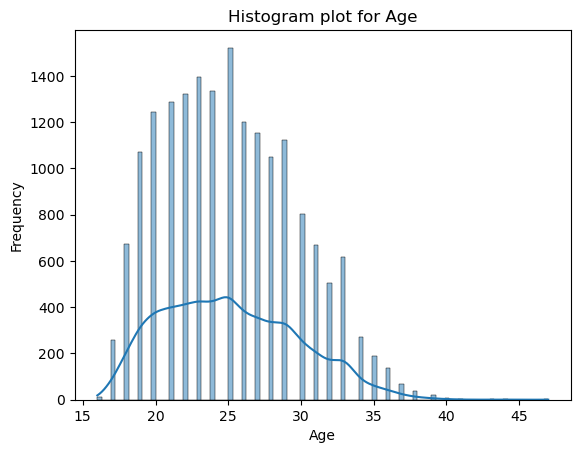

In [40]:
#plot histogram of the age features
sns.histplot(data=players, x='Age', bins=100, kde= True);
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram plot for Age')
plt.show()

- Age distribution is slightly right skewed, the mean is slightly higher than the median

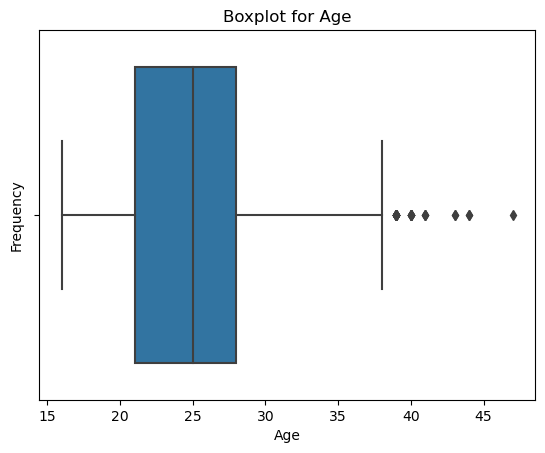

In [41]:
#plot histogram of the age features
sns.boxplot(data=players, x='Age');
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Boxplot for Age')
plt.show()

- There are outliers from age 38 to 47

### Question 2: Interpret the age after which a player stops improving.

### Answer

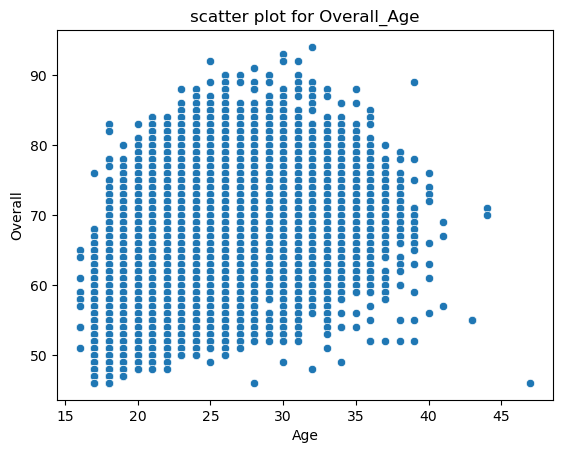

In [42]:
#Scatter plot to view age for overal rating
sns.scatterplot(data=players, x='Age', y='Overall')
plt.xlabel('Age')
plt.ylabel('Overall')
plt.title('scatter plot for Overall_Age')
plt.show()

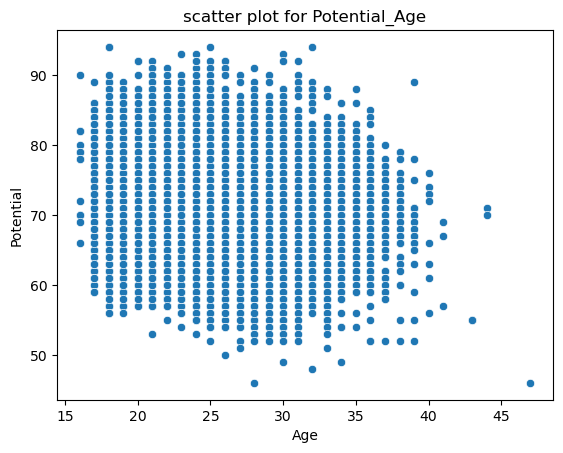

In [43]:
sns.scatterplot(data=players, x='Age', y='Potential',)
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title('scatter plot for Potential_Age')
plt.show()

From the two scatter plot above, we can deduce the age at which players stop improving by considering the rating and potential;
the highest rating for age 40 is 77 while the highest potential for age 40 is 75, at this stage the rating and potential of the players begin to depreciate. We can conclude that the player stop improving at age 40.

### Q3. Which type of offensive player tends to get paid the most: the striker, the rightwinger, or the left-winger? Visualize through a scatter plot for all three.

### Answer

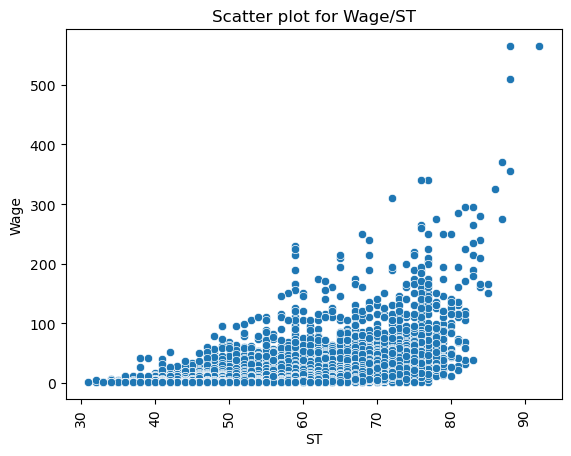

In [44]:
sns.scatterplot(data=players, x='ST', y='Wage')
plt.xlabel('ST')
plt.ylabel('Wage')
plt.xticks(rotation=90)
plt.title('Scatter plot for Wage/ST')
plt.show()

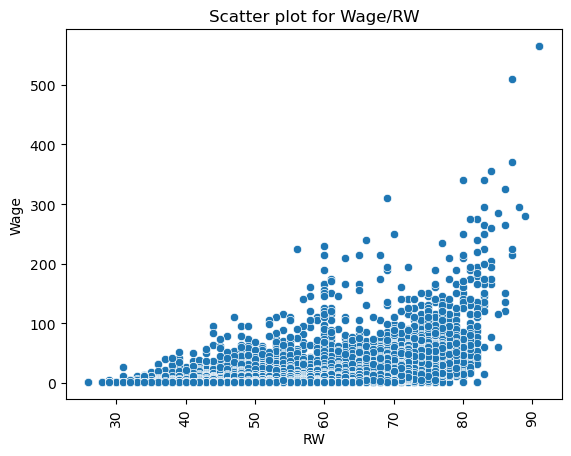

In [45]:
sns.scatterplot(data=players, x='RW', y='Wage')
plt.xlabel('RW')
plt.ylabel('Wage')
plt.xticks(rotation=90)
plt.title('Scatter plot for Wage/RW')
plt.show()

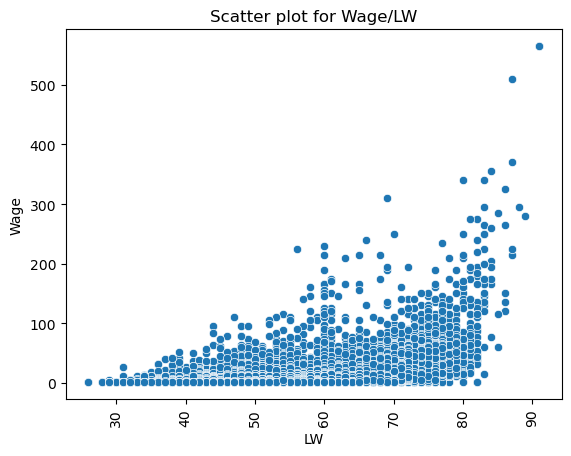

In [46]:
sns.scatterplot(data=players, x='RW', y='Wage')
plt.xlabel('LW')
plt.ylabel('Wage')
plt.xticks(rotation=90)
plt.title('Scatter plot for Wage/LW')
plt.show()

The offensive players that tend to be paid more are the Strikers due to the fact below;
- it have more players in the above 90 brackets that collect over 500 million than the other two offensive players
- Between 70 and 80 bracket mark, it has the highest wages between 300 million and 400 million.

#### Q4. Top 5 players for every preferred position in terms of overall as well as potential points. Who was the best in 2018?

### Answer

In [47]:
players['Position'] = players['Preferred Positions'].apply(lambda x: x[:3])
players['Position'].unique()

array(['ST ', 'RW ', 'LW ', 'GK ', 'CDM', 'CB ', 'RM ', 'CM ', 'LM ',
       'LB ', 'CAM', 'RB ', 'CF ', 'RWB', 'LWB'], dtype=object)

In [48]:
#Groupby to visualize the first five players interms of overall and potential for 'ST'
players[['Overall','Potential']].groupby([players['ST'], players['Name']]).value_counts(ascending = True).tail()

ST    Name               Overall  Potential
87.0  G. HiguaÃ­n        90       90           1
88.0  L. Messi           93       93           1
      L. SuÃ¡rez         92       92           1
      R. Lewandowski     91       91           1
92.0  Cristiano Ronaldo  94       94           1
dtype: int64

In [49]:
#Groupby to visualize the first five players interms of overall and potential for 'RW'
players[['Overall','Potential']].groupby([players['RW'], players['Name']]).value_counts(ascending = True).tail()

RW    Name               Overall  Potential
87.0  P. Dybala          88       93           1
88.0  E. Hazard          90       91           1
89.0  Neymar             92       94           1
91.0  Cristiano Ronaldo  94       94           1
      L. Messi           93       93           1
dtype: int64

In [50]:
#Groupby to visualize the first five players interms of overall and potential for 'LW'
players[['Overall','Potential']].groupby([players['LW'], players['Name']]).value_counts(ascending = True).tail()

LW    Name               Overall  Potential
87.0  P. Dybala          88       93           1
88.0  E. Hazard          90       91           1
89.0  Neymar             92       94           1
91.0  Cristiano Ronaldo  94       94           1
      L. Messi           93       93           1
dtype: int64

In [51]:
#Groupby to visualize the first five players interms of overall and potential for 'CDM'
players[['Overall','Potential']].groupby([players['CDM'], players['Name']]).value_counts(ascending = True).tail()

CDM   Name           Overall  Potential
84.0  Casemiro       85       89           1
      M. Verratti    87       91           1
      N. KantÃ©      87       90           1
      R. Nainggolan  86       86           1
85.0  A. Vidal       87       87           1
dtype: int64

In [52]:
#Groupby to visualize the first five players interms of overall and potential for 'CB'
players[['Overall','Potential']].groupby([players['CB'], players['Name']]).value_counts(ascending = True).tail()

CB    Name          Overall  Potential
85.0  Thiago Silva  88       88           1
86.0  D. GodÃ­n     88       88           1
      G. Chiellini  89       89           1
      L. Bonucci    88       88           1
87.0  Sergio Ramos  90       90           1
dtype: int64

In [53]:
#Groupby to visualize the first five players interms of overall and potential for 'RM'
players[['Overall','Potential']].groupby([players['RM'], players['Name']]).value_counts(ascending = True).tail()

RM    Name               Overall  Potential
87.0  E. Hazard          90       91           1
      G. Bale            89       89           1
      Neymar             92       94           1
89.0  Cristiano Ronaldo  94       94           1
90.0  L. Messi           93       93           1
dtype: int64

In [54]:
#Groupby to visualize the first five players interms of overall and potential for 'CM'
players[['Overall','Potential']].groupby([players['CM'], players['Name']]).value_counts(ascending = True).tail()

CM    Name         Overall  Potential
85.0  M. HamÅ¡Ã­k  87       87           1
      M. Verratti  87       91           1
      Thiago       88       90           1
86.0  L. ModriÄ‡   89       89           1
87.0  T. Kroos     90       90           1
dtype: int64

In [55]:
#Groupby to visualize the first five players interms of overall and potential for 'LM'
players[['Overall','Potential']].groupby([players['LM'], players['Name']]).value_counts(ascending = True).tail()

LM    Name               Overall  Potential
87.0  E. Hazard          90       91           1
      G. Bale            89       89           1
      Neymar             92       94           1
89.0  Cristiano Ronaldo  94       94           1
90.0  L. Messi           93       93           1
dtype: int64

In [56]:
#Groupby to visualize the first five players interms of overall and potential for 'LB'
players[['Overall','Potential']].groupby([players['LB'], players['Name']]).value_counts(ascending = True).tail()

LB    Name           Overall  Potential
83.0  R. Nainggolan  86       86           1
84.0  Alex Sandro    86       88           1
      Azpilicueta    85       87           1
      Marcelo        87       87           1
      Sergio Ramos   90       90           1
dtype: int64

In [57]:
#Groupby to visualize the first five players interms of overall and potential for 'CAM'
players[['Overall','Potential']].groupby([players['CAM'], players['Name']]).value_counts(ascending = True).tail()

CAM   Name               Overall  Potential
87.0  L. SuÃ¡rez         92       92           1
88.0  E. Hazard          90       91           1
      Neymar             92       94           1
89.0  Cristiano Ronaldo  94       94           1
92.0  L. Messi           93       93           1
dtype: int64

In [58]:
#Groupby to visualize the first five players interms of overall and potential for 'RB'
players[['Overall','Potential']].groupby([players['RB'], players['Name']]).value_counts(ascending = True).tail()

RB    Name           Overall  Potential
83.0  R. Nainggolan  86       86           1
84.0  Alex Sandro    86       88           1
      Azpilicueta    85       87           1
      Marcelo        87       87           1
      Sergio Ramos   90       90           1
dtype: int64

In [59]:
#Groupby to visualize the first five players interms of overall and potential for 'CF'
players[['Overall','Potential']].groupby([players['CF'], players['Name']]).value_counts(ascending = True).tail()

CF    Name               Overall  Potential
87.0  S. AgÃ¼ero         89       89           1
88.0  L. SuÃ¡rez         92       92           1
      Neymar             92       94           1
91.0  Cristiano Ronaldo  94       94           1
92.0  L. Messi           93       93           1
dtype: int64

In [60]:
#Groupby to visualize the first five players interms of overall and potential for 'RWB'
players[['Overall','Potential']].groupby([players['RWB'], players['Name']]).value_counts(ascending = True).tail()

RWB   Name           Overall  Potential
84.0  Alex Sandro    86       88           1
      D. Alaba       86       88           1
      Jordi Alba     85       85           1
      Marcelo        87       87           1
      R. Nainggolan  86       86           1
dtype: int64

In [61]:
#Groupby to visualize the first five players interms of overall and potential for 'LWB'
players[['Overall','Potential']].groupby([players['LWB'], players['Name']]).value_counts(ascending = True).tail()

LWB   Name           Overall  Potential
84.0  Alex Sandro    86       88           1
      D. Alaba       86       88           1
      Jordi Alba     85       85           1
      Marcelo        87       87           1
      R. Nainggolan  86       86           1
dtype: int64

In [62]:
players['Overall'].groupby([players['Position'], players['Name']]).value_counts()

Position  Name           Overall
CAM       A. AjdareviÄ‡  72         1
          A. Aktas       52         1
          A. Al Eid      52         1
          A. Al Ghamdi   67         1
          A. Al Qahtani  64         1
                                   ..
ST        Ãlvaro        73         1
          Ãngel         72         1
          Ã“scar Pinchi  70         1
          Ã‰der          76         1
          Ã‰lton         74         1
Name: Overall, Length: 17923, dtype: int64

In [63]:
players['Position'].groupby([players['Overall'], players['Potential']]).value_counts().head(5)

Overall  Potential  Position
46       46         CM          1
                    GK          1
         56         CB          1
         58         CM          1
         61         ST          1
Name: Position, dtype: int64

### Q5. Which club(s) has the maximum share of players from England? Which club(s) has the maximum share of players from Spain? Which club(s) have the maximum share of players from Germany?

### Answer

In [64]:
#Club(s) with the maximum share of players from England
players[players['Nationality']=='England'].Club.value_counts().head()

Shrewsbury           24
Bolton Wanderers     24
Colchester United    22
Exeter City          22
Burton Albion        22
Name: Club, dtype: int64

In [65]:
#Club(s) with the maximum share of players from Spain
players[players['Nationality']=='Spain'].Club.value_counts().head()

CA Osasuna                 27
Athletic Club de Bilbao    26
Lorca Deportiva CF         25
Real Valladolid            25
UD Las Palmas              25
Name: Club, dtype: int64

In [66]:
#Club(s) with the maximum share of players from Germany
players[players['Nationality']=='Germany'].Club.value_counts().head()

Holstein Kiel           26
Chemnitzer FC           23
 SSV Jahn Regensburg    23
FC Carl Zeiss Jena      23
SpVgg Unterhaching      23
Name: Club, dtype: int64

### Q6. As a National coach of the France team, you want to compare the national team of England, Spain, Italy, and Germany to understand the competition. The formation of the teams is restricted to 4-3-3 (4 defenders, 3 midfielders, 3 forwards, 1 Goal Keeper) and players with an overall value of more than 75 are preferred, now form the best team for each of the mentioned countries and compare them. Note down all the insights that you as a business analyst should share with the coach.

### Answer

In [67]:
#To get players above rating 75 for all nationality
players_OV75= players[players['Overall']>75]
players_OV75

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,565.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,...,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,565.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,...,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,280.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,...,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,510.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,...,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,230.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,...,55,25,11,61,44,10,83,70,11,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,1582,Alberto Moreno,24,https://cdn.sofifa.org/48/18/players/205566.png,Spain,https://cdn.sofifa.org/flags/45.png,76,79,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,8.0,76.0,2028,87,83,86,87,79,63,78,59,76,59,40,10,14,9,10,11,61,69+1,85,64,74,63+1,54,69,...,74,80,76,88,85,72+1,64,58,35,72.0,71.0,71.0,72.0,71.0,72.0,75.0,71.0,71.0,71.0,72.0,74.0,70.0,74.0,76.0,LB,72.0,75.0,71.0,71.0,71.0,72.0,74.0,70.0,74.0,76.0,70.0,LB
1583,1583,Diego Rico,24,https://cdn.sofifa.org/48/18/players/220414.png,Spain,https://cdn.sofifa.org/flags/45.png,76,81,CD LeganÃ©s,https://cdn.sofifa.org/24/18/teams/100888.png,8.5,22.0,1976,72,70,68,70,67,64,76,71,66,38,69,10,9,15,11,10,72,78,74,57,72,70,43,59,...,73,82,74,79,89,75,76,63,53,65.0,73.0,71.0,65.0,67.0,65.0,75.0,73.0,67.0,71.0,65.0,67.0,64.0,65.0,75.0,LWB LB,65.0,75.0,73.0,67.0,71.0,65.0,67.0,64.0,65.0,75.0,64.0,LWB
1584,1584,MossorÃ³,33,https://cdn.sofifa.org/48/18/players/176894.png,Brazil,https://cdn.sof

In [68]:
#To get players above rating 75 for England
players_OV75_England= players_OV75[players_OV75['Nationality']=='England']
players_OV75_England.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
46,46,H. Kane,23,https://cdn.sofifa.org/48/18/players/202126.png,England,https://cdn.sofifa.org/flags/14.png,86,90,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,59.0,165.0,2057,68,74,73,62,82,84,70,71,78,90,66,8,10,11,14,11,83,35,70,67,84,41,84,89,...,75,87,38,74,85,36,86,75,73,79.0,57.0,62.0,82.0,74.0,79.0,60.0,57.0,74.0,62.0,82.0,78.0,84.0,79.0,62.0,ST,79.0,60.0,57.0,74.0,62.0,82.0,78.0,84.0,79.0,62.0,84.0,ST
96,96,D. Alli,21,https://cdn.sofifa.org/48/18/players/211117.png,England,https://cdn.sofifa.org/flags/14.png,84,90,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,43.0,115.0,2122,77,84,74,62,85,86,68,71,83,84,53,7,6,9,11,8,75,67,69,76,79,60,68,86,...,83,77,57,76,89,63,71,83,76,83.0,69.0,75.0,83.0,81.0,83.0,72.0,69.0,81.0,75.0,83.0,81.0,81.0,81.0,73.0,LM CF CAM,83.0,72.0,69.0,81.0,75.0,83.0,81.0,81.0,81.0,73.0,81.0,LM
123,123,G. Cahill,31,https://cdn.sofifa.org/48/18/players/164468.png,England,https://cdn.sofifa.org/flags/14.png,84,84,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,21.0,160.0,1839,62,84,62,51,63,75,28,48,58,56,27,5,12,9,5,12,86,83,82,61,66,84,53,45,...,65,63,84,63,69,85,80,56,47,61.0,82.0,75.0,61.0,65.0,61.0,73.0,82.0,65.0,75.0,61.0,58.0,64.0,58.0,69.0,CB,61.0,73.0,82.0,65.0,75.0,61.0,58.0,64.0,58.0,69.0,64.0,CB
161,161,K. Walker,27,https://cdn.sofifa.org/48/18/players/188377.png,England,https://cdn.sofifa.org/flags/14.png,83,84,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,24.0,130.0,2164,86,78,70,72,76,75,78,76,77,51,71,12,6,16,15,8,73,78,83,67,68,79,63,66,...,75,86,83,93,90,84,77,69,57,73.0,79.0,78.0,73.0,74.0,73.0,82.0,79.0,74.0,78.0,73.0,76.0,72.0,74.0,81.0,RWB RB,73.0,82.0,79.0,74.0,78.0,73.0,76.0,72.0,74.0,81.0,72.0,RWB
171,171,A. Lallana,29,https://cdn.sofifa.org/48/18/players/180819.png,England,https://cdn.sofifa.org/flags/14.png,83,83,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,25.0,135.0,2141,74,74,83,76,86,80,74,77,85,79,66,6,15,14,8,11,67,68,73,77,72,60,70,77,...,86,72,62,72,90,67,67,83,72,82.0,69.0,75.0,80.0,81.0,82.0,73.0,69.0,81.0,75.0,80.0,81.0,77.0,80.0,75.0,CM,82.0,73.0,69.0,81.0,75.0,80.0,81.0,77.0,80.0,75.0,77.0,CM


In [69]:
#To get players above rating 75 for Spain
players_OV75_Spain= players_OV75[players_OV75['Nationality']=='Spain']
players_OV75_Spain.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,64.5,215.0,1458,57,38,60,43,42,64,17,21,18,13,19,90,85,87,86,90,21,30,67,51,12,13,40,12,...,50,31,13,58,40,21,64,68,13,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
10,10,Sergio Ramos,31,https://cdn.sofifa.org/48/18/players/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,52.0,310.0,2153,75,84,79,60,84,80,66,73,61,60,67,11,8,9,7,11,91,88,93,72,55,86,68,52,...,78,79,91,77,84,89,81,63,66,70.0,87.0,83.0,70.0,74.0,70.0,84.0,87.0,74.0,83.0,70.0,71.0,72.0,69.0,81.0,CB,70.0,84.0,87.0,74.0,83.0,70.0,71.0,72.0,69.0,81.0,72.0,CB
22,22,Thiago,26,https://cdn.sofifa.org/48/18/players/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,88,90,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,70.5,225.0,2185,77,57,90,86,92,83,72,85,90,69,77,6,11,7,9,13,58,78,75,90,82,49,75,83,...,91,75,62,68,75,64,59,86,90,86.0,66.0,76.0,83.0,85.0,86.0,72.0,66.0,85.0,76.0,83.0,83.0,77.0,83.0,75.0,CDM CAM CM,86.0,72.0,66.0,85.0,76.0,83.0,83.0,77.0,83.0,75.0,77.0,CDM
42,42,David Silva,31,https://cdn.sofifa.org/48/18/players/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,44.0,220.0,1977,72,51,92,89,90,92,83,82,84,71,75,1,1,1,1,1,54,43,66,79,73,25,73,81,...,91,71,29,65,78,44,56,92,79,84.0,50.0,64.0,81.0,81.0,84.0,59.0,50.0,81.0,64.0,81.0,82.0,75.0,82.0,65.0,LM CM CAM,84.0,59.0,50.0,81.0,64.0,81.0,82.0,75.0,82.0,65.0,75.0,LM
44,44,PiquÃ©,30,https://cdn.sofifa.org/48/18/players/152729.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,37.5,240.0,1974,55,72,58,42,78,86,57,58,59,64,43,10,11,14,15,8,83,88,74,80,51,86,69,58,...,81,62,86,73,66,87,83,62,57,68.0,84.0,81.0,68.0,74.0,68.0,78.0,84.0,74.0,81.0,68.0,68.0,69.0,66.0,76.0,CB,68.0,78.0,84.0,74.0,81.0,68.0,68.0,69.0,66.0,76.0,69.0,CB


In [70]:
#To get players above rating 75 for Italy
players_OV75_Italy= players_OV75[players_OV75['Nationality']=='Italy']
players_OV75_Italy.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
17,17,G. Chiellini,32,https://cdn.sofifa.org/48/18/players/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,38.0,225.0,1867,68,92,59,64,57,82,58,60,58,33,31,3,3,2,4,3,84,88,89,59,49,92,50,28,...,59,78,90,78,68,92,91,50,45,55.0,86.0,76.0,55.0,60.0,55.0,78.0,86.0,60.0,76.0,55.0,58.0,59.0,56.0,75.0,CB,55.0,78.0,86.0,60.0,76.0,55.0,58.0,59.0,56.0,75.0,59.0,CB
18,18,G. Buffon,39,https://cdn.sofifa.org/48/18/players/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,4.5,110.0,1335,49,38,55,49,28,70,13,20,26,15,13,89,88,74,90,84,13,28,75,35,13,10,22,12,...,37,39,11,43,39,11,69,50,17,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
24,24,L. Bonucci,30,https://cdn.sofifa.org/48/18/players/184344.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Milan,https://cdn.sofifa.org/24/18/teams/47.png,44.0,210.0,1995,62,82,60,52,75,84,44,56,69,39,61,2,2,3,2,4,88,90,85,85,65,84,70,38,...,79,74,88,72,73,88,85,74,58,68.0,86.0,83.0,66.0,75.0,68.0,79.0,86.0,75.0,83.0,66.0,66.0,65.0,63.0,76.0,CB,68.0,79.0,86.0,75.0,83.0,66.0,66.0,65.0,63.0,76.0,65.0,CB
34,34,M. Verratti,24,https://cdn.sofifa.org/48/18/players/199556.png,Italy,https://cdn.sofifa.org/flags/27.png,87,91,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,64.5,130.0,2154,69,89,87,94,88,91,72,73,90,58,64,12,12,15,15,10,55,86,64,89,58,76,64,71,...,90,56,79,62,77,84,56,88,64,82.0,77.0,84.0,77.0,85.0,82.0,79.0,77.0,85.0,84.0,77.0,80.0,69.0,78.0,80.0,CDM CM,82.0,79.0,77.0,85.0,84.0,77.0,80.0,69.0,78.0,80.0,69.0,CDM
72,72,L. Insigne,26,https://cdn.sofifa.org/48/18/players/198219.png,Italy,https://cdn.sofifa.org/flags/27.png,85,86,Napoli,https://cdn.sofifa.org/24/18/teams/48.png,45.0,115.0,1949,94,34,96,93,90,78,83,83,88,73,77,8,4,14,9,10,56,26,53,73,80,16,61,83,...,83,70,22,86,75,24,44,87,74,85.0,39.0,54.0,83.0,77.0,85.0,55.0,39.0,77.0,54.0,83.0,84.0,76.0,85.0,60.0,LW,85.0,55.0,39.0,77.0,54.0,83.0,84.0,76.0,85.0,60.0,76.0,LW


In [71]:
#To get players above rating 75 for Germany
players_OV75_Germany= players_OV75[players_OV75['Nationality']=='Germany']
players_OV75_Germany.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,230.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,...,55,25,11,61,44,10,83,70,11,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,79.0,340.0,2165,60,60,71,69,89,85,85,85,79,76,84,10,11,13,7,10,54,85,32,93,90,63,73,79,...,90,87,69,52,77,82,74,88,82,83.0,72.0,82.0,81.0,87.0,83.0,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,CDM CM,83.0,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0,CDM
25,25,J. Boateng,28,https://cdn.sofifa.org/48/18/players/183907.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,48.0,215.0,1989,72,82,58,53,71,86,69,56,67,34,31,7,12,15,6,5,85,83,75,80,58,88,46,47,...,75,79,90,78,74,91,91,76,53,67.0,85.0,82.0,66.0,73.0,67.0,81.0,85.0,73.0,82.0,66.0,69.0,65.0,65.0,79.0,CB,67.0,81.0,85.0,73.0,82.0,66.0,69.0,65.0,65.0,79.0,65.0,CB
27,27,M. Hummels,28,https://cdn.sofifa.org/48/18/players/178603.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,48.0,215.0,2038,62,66,64,58,77,91,64,65,68,55,53,15,6,10,5,6,89,89,68,85,51,85,68,56,...,80,71,90,65,66,92,85,79,60,71.0,85.0,83.0,69.0,77.0,71.0,80.0,85.0,77.0,83.0,69.0,70.0,69.0,68.0,78.0,CB,71.0,80.0,85.0,77.0,83.0,69.0,70.0,69.0,68.0,78.0,69.0,CB
28,28,M. Ã–zil,28,https://cdn.sofifa.org/48/18/players/176635.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,Arsenal,https://cdn.sofifa.org/24/18/teams/1.png,60.0,265.0,1927,75,48,83,70,90,78,82,84,86,74,79,6,14,10,6,14,54,24,52,84,76,22,67,83,...,89,70,19,68,69,16,57,92,77,85.0,41.0,57.0,82.0,79.0,85.0,52.0,41.0,79.0,57.0,82.0,83.0,76.0,83.0,58.0,RW CAM,85.0,52.0,41.0,79.0,57.0,82.0,83.0,76.0,83.0,58.0,76.0,RW


In [72]:
#To get players above rating 75 for France
players_OV75_France= players_OV75[players_OV75['Nationality']=='France']
players_OV75_France.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
21,21,A. Griezmann,26,https://cdn.sofifa.org/48/18/players/194765.png,France,https://cdn.sofifa.org/flags/18.png,88,91,AtlÃ©tico Madrid,https://cdn.sofifa.org/24/18/teams/240.png,75.0,150.0,2104,87,69,90,80,86,86,82,84,87,88,75,14,8,14,13,14,80,35,87,75,82,23,71,91,...,79,81,11,86,76,22,61,76,87,84.0,48.0,57.0,85.0,76.0,84.0,56.0,48.0,76.0,57.0,85.0,84.0,85.0,86.0,60.0,LW RW ST,84.0,56.0,48.0,76.0,57.0,85.0,84.0,85.0,86.0,60.0,85.0,LW
29,29,H. Lloris,30,https://cdn.sofifa.org/48/18/players/167948.png,France,https://cdn.sofifa.org/flags/18.png,88,88,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,38.0,165.0,1318,65,31,55,54,34,61,13,11,10,10,10,88,86,68,82,90,10,27,74,50,14,12,40,10,...,50,23,18,63,41,10,43,30,11,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
33,33,N. KantÃ©,26,https://cdn.sofifa.org/48/18/players/215914.png,France,https://cdn.sofifa.org/flags/18.png,87,90,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,52.5,190.0,2154,82,90,83,90,79,84,67,49,77,65,49,15,12,10,7,10,54,91,79,79,66,75,54,71,...,84,72,85,80,94,89,77,76,56,78.0,81.0,84.0,76.0,81.0,78.0,82.0,81.0,81.0,84.0,76.0,78.0,72.0,76.0,83.0,CM CDM,78.0,82.0,81.0,81.0,84.0,76.0,78.0,72.0,76.0,83.0,72.0,CM
35,35,P. Pogba,24,https://cdn.sofifa.org/48/18/players/195864.png,France,https://cdn.sofifa.org/flags/18.png,87,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,66.5,195.0,2238,72,75,76,61,89,85,78,84,86,71,82,5,6,2,4,3,73,68,85,88,82,66,76,83,...,86,90,66,76,91,68,91,86,85,84.0,74.0,79.0,83.0,84.0,84.0,75.0,74.0,84.0,79.0,83.0,83.0,81.0,82.0,77.0,CDM CM,84.0,75.0,74.0,84.0,79.0,83.0,83.0,81.0,82.0,77.0,81.0,CDM
64,64,K. Benzema,29,https://cdn.sofifa.org/48/18/players/165153.png,France,https://cdn.sofifa.org/flags/18.png,86,86,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,44.5,295.0,1950,77,65,77,60,86,82,75,79,82,87,73,13,11,5,5,7,78,22,70,47,77,13,82,87,...,86,83,12,78,73,15,78,85,79,82.0,44.0,52.0,84.0,72.0,82.0,51.0,44.0,72.0,52.0,84.0,80.0,83.0,83.0,56.0,ST,82.0,51.0,44.0,72.0,52.0,84.0,80.0,83.0,83.0,56.0,83.0,ST


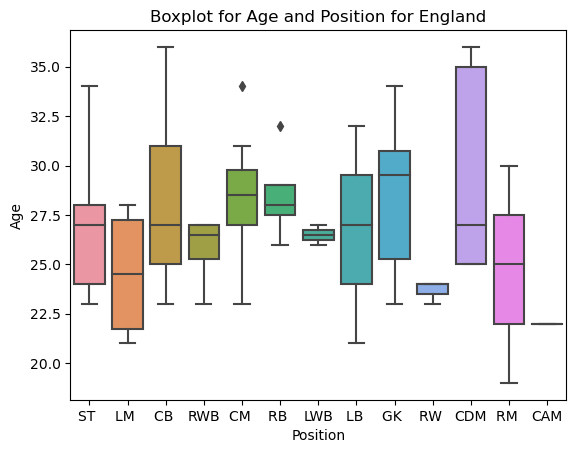

In [73]:
#Boxplot to show the age of players in various position for England
sns.boxplot(data=players_OV75_England, x='Position', y= 'Age');
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Boxplot for Age and Position for England')
plt.show()

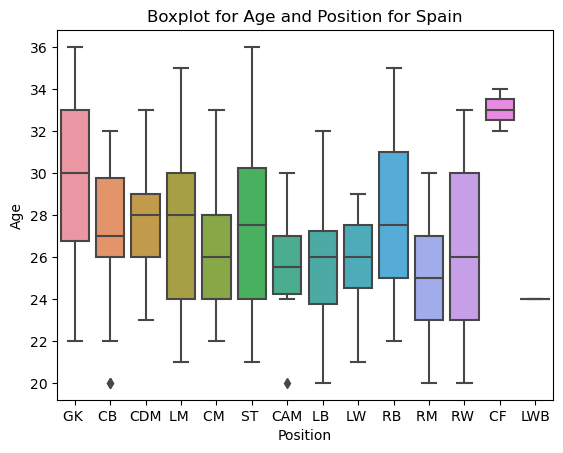

In [74]:
#Boxplot to show the age of players in various position for Spain
sns.boxplot(data=players_OV75_Spain, x='Position', y= 'Age');
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Boxplot for Age and Position for Spain')
plt.show()

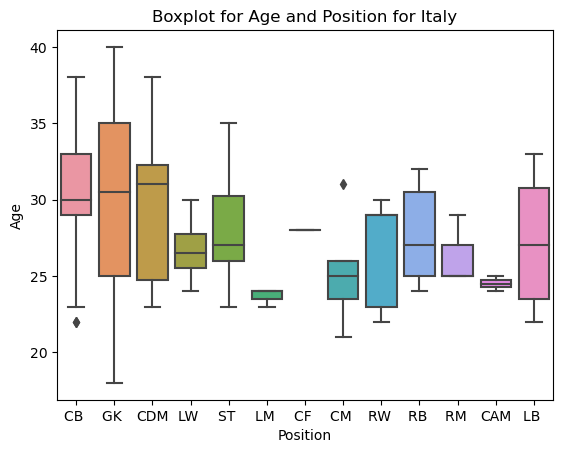

In [75]:
#Boxplot to show the age of players in various position for Italy
sns.boxplot(data=players_OV75_Italy, x='Position', y= 'Age');
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Boxplot for Age and Position for Italy')
plt.show()

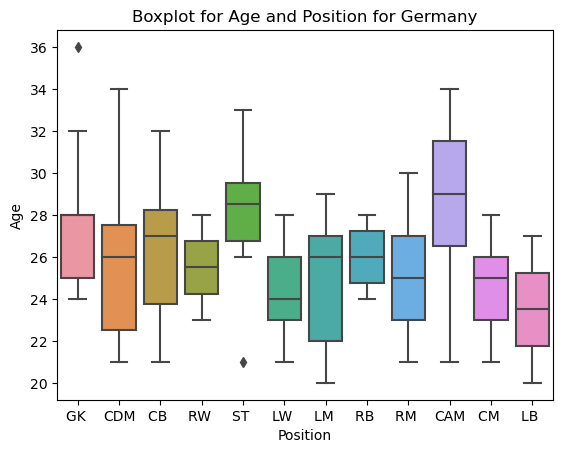

In [76]:
#Boxplot to show the age of players in various position for Germany
sns.boxplot(data=players_OV75_Germany, x='Position', y= 'Age');
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Boxplot for Age and Position for Germany')
plt.show()

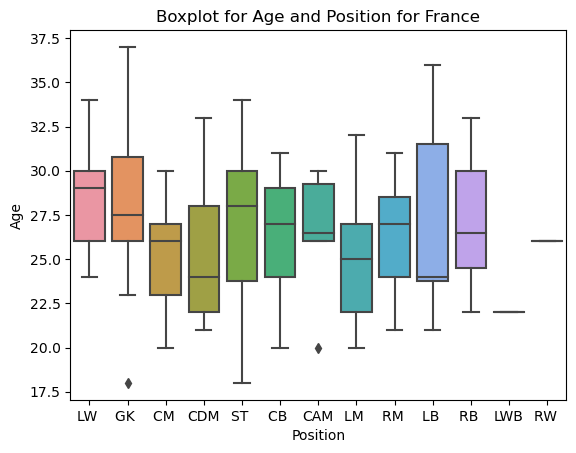

In [77]:
#Boxplot to show the age of players in various position for France
sns.boxplot(data=players_OV75_France, x='Position', y= 'Age');
plt.xlabel('Position')
plt.ylabel('Age')
plt.title('Boxplot for Age and Position for France')
plt.show()

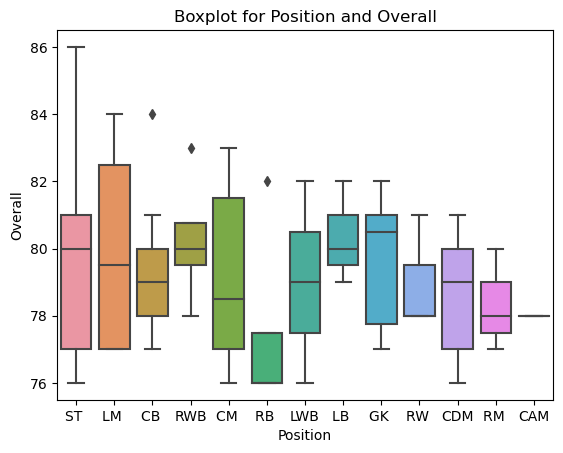

In [78]:
#Boxplot to show the position that players are most rated for England
sns.boxplot(data=players_OV75_England, x='Position', y= 'Overall');
plt.xlabel('Position')
plt.ylabel('Overall')
plt.title('Boxplot for Position and Overall')
plt.show()

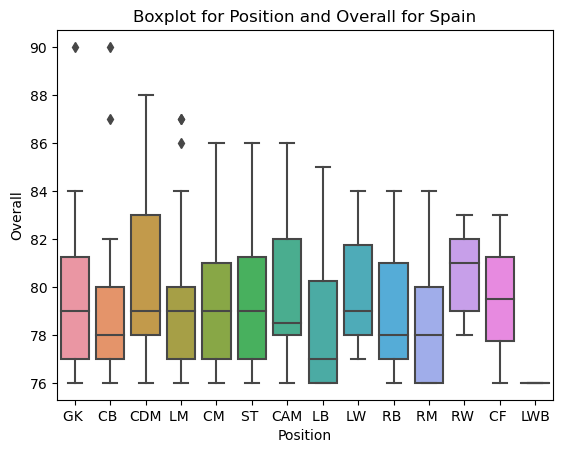

In [79]:
#Boxplot to show the position that players are most rated for Spain
sns.boxplot(data=players_OV75_Spain, x='Position', y= 'Overall');
plt.xlabel('Position')
plt.ylabel('Overall')
plt.title('Boxplot for Position and Overall for Spain')
plt.show()

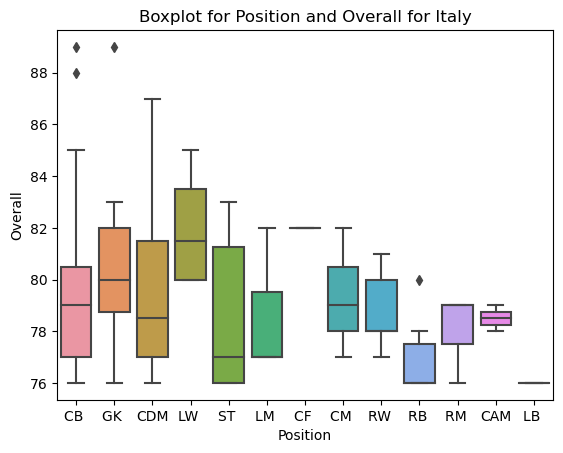

In [80]:
#Boxplot to show the position that players are most rated for Italy
sns.boxplot(data=players_OV75_Italy, x='Position', y= 'Overall');
plt.xlabel('Position')
plt.ylabel('Overall')
plt.title('Boxplot for Position and Overall for Italy')
plt.show()

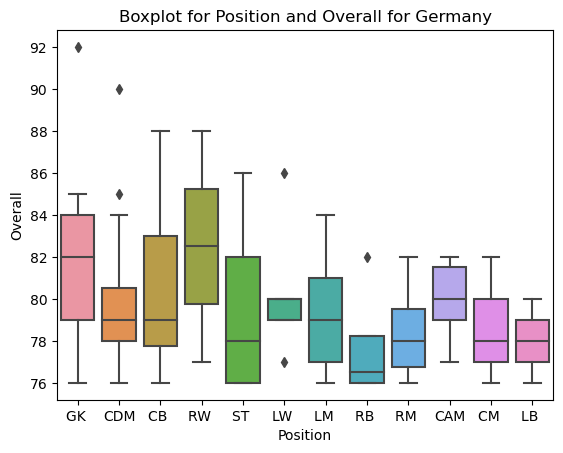

In [81]:
#Boxplot to show the position that players are most rated for Germany
sns.boxplot(data=players_OV75_Germany, x='Position', y= 'Overall');
plt.xlabel('Position')
plt.ylabel('Overall')
plt.title('Boxplot for Position and Overall for Germany')
plt.show()

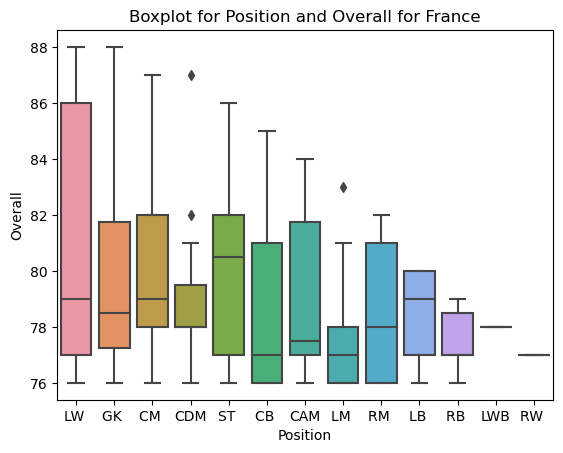

In [82]:
#Boxplot to show the position that players are most rated for France
sns.boxplot(data=players_OV75_France, x='Position', y= 'Overall');
plt.xlabel('Position')
plt.ylabel('Overall')
plt.title('Boxplot for Position and Overall for France')
plt.show()

In [83]:
#To get the position of each player in the country England
players_OV75_England['Name'].groupby([players_OV75_England['Position'], players_OV75_England['Overall']]).unique()

Position  Overall
CAM       78                              [J. Ward-Prowse]
CB        77              [C. Davies, S. Cook, H. Maguire]
          78                   [J. Terry, S. Dann, B. Mee]
          79           [J. Stones, P. Jones, R. Shawcross]
          80                                 [P. Jagielka]
          81                       [M. Keane, C. Smalling]
          84                                   [G. Cahill]
CDM       76                                [T. Cleverley]
          77                                  [J. Shelvey]
          79                                    [G. Barry]
          80                                  [M. Carrick]
          81                                 [J. Wilshere]
CM        76                                    [M. Noble]
          77         [L. Britton, F. Delph, L. Cattermole]
          78                                     [J. Cork]
          79                               [D. Drinkwater]
          80                          

Players are chosen based on Overall rating and position to consider the formation of 4-3-3 for the Teams as shown below;

For England

Forward
- ST is H. Kane(86)
- RW is R. Barkley (81)
- LM is D. Alli(84)

Midfield
- CDM is J. Wilshere(81)
- CM are A. Lallana(83), J. Henderson(82)

Defender
- CB are G. Cahill(84), C. Smalling(81)
- RB is K. Walker(83)
- LB is L. Baines (82)

GK
- J. Hart(82)

In [84]:
#To get the position of each player in the country Spain
players_OV75_Spain['Name'].groupby([players_OV75_Spain['Position'], players_OV75_Spain['Overall']]).unique()

Position  Overall
CAM       76                                  [Ibai GÃ³mez, Samu Saiz]
          78                               [Dani Ceballos, Carles Gil]
          79                                           [Gerard Moreno]
          82                  [Manu Trigueros, Jonathan Viera, Iborra]
          86                                          [Cesc FÃ bregas]
CB        76                     [BÃ³veda, Laguardia, Aythami Artiles]
          77         [IvÃ¡n Ramis, Bruno, Jordi Amat, Vallejo, Timo...
          78         [Yeray, Jorge MerÃ©, Bigas, RaÃºl Navas, FontÃ s]
          80                      [Hugo Mallo, Nacho Monreal, Marcano]
          81                                                  [Bartra]
          82           [IÃ±igo MartÃ­nez, VÃ­ctor RuÃ­z, RaÃºl Albiol]
          87                                                  [PiquÃ©]
          90                                            [Sergio Ramos]
CDM       76                                        [GÃ¡lve

Players are chosen based on Overall rating and position to consider the formation of 4-3-3 for the Teams as shown below;

For Spain

Forward
- ST is Diego Costa(86)
- RW is Iago Aspas (83)
- LW is Pedro (84)

Midfield
- CDM is Thiago(88)
- CM is Sergio Busquets(86)
- LM is Iniesta(87)

Defender
- CB are Sergio Ramos(90), PiquÃ©(87)
- RB is Carvajal(84)
- LB is Jordi Alba (85)

GK
- De Gea(90)

In [85]:
#To get the position of each player in the country Italy
players_OV75_Italy['Name'].groupby([players_OV75_Italy['Position'], players_OV75_Italy['Overall']]).unique()

Position  Overall
CAM       78                                                [S. Verdi]
          79                                             [R. Saponara]
CB        76         [M. Caldara, A. Ranocchia, D. Gastaldello, D. ...
          77                   [D. Bonera, M. Andreolli, A. Gamberini]
          78                                            [S. Bocchetti]
          79                    [A. Romagnoli, L. Tonelli, A. Ogbonna]
          80                      [D. Rugani, D. Criscito, G. Paletta]
          81                                               [D. Astori]
          82                                               [F. Acerbi]
          85                                             [A. Barzagli]
          88                                              [L. Bonucci]
          89                                            [G. Chiellini]
CDM       76                                 [F. Viviani, L. Cigarini]
          77                            [A. Bertolacci, F. 

Players are chosen based on Overall rating and position to consider the formation of 4-3-3 for the Teams as shown below;

Italy

Forward
- ST is T. A. Belotti(83)
- LW is G. Bonaventura (83)
- LW is L. Insigne (85)

Midfield
- CDM is M. Verratti(87), C. Marchisio(85)
- CM is I. A. Florenzi(82)

Defender
- CB are G. Chiellini(89), L. Bonucci(88)
- RB is M. Darmian(80)
- LB is L. Antonelli (76)

GK
- G. Buffon(89)

In [86]:
#To get the position of each player in the country Germany
players_OV75_Germany['Name'].groupby([players_OV75_Germany['Position'], players_OV75_Germany['Overall']]).unique()

Position  Overall
CAM       77                                                [A. Meier]
          78                                              [C. Gentner]
          80                                  [J. Brandt, L. Podolski]
          81                                               [M. GÃ¶tze]
          82                                     [L. Stindl, M. Kruse]
CB        76                     [T. Strobl, T. Jantschke, M. Compper]
          77                                                 [S. Bell]
          78                                               [D. Heintz]
          79                          [W. Orban, B. HÃ¼bner, S. Tasci]
          81                                          [P. Mertesacker]
          82                                                  [J. Tah]
          83                                   [N. SÃ¼le, B. HÃ¶wedes]
          84                                              [S. Mustafi]
          88                                  [J. Boateng, 

Players are chosen based on Overall rating and position to consider the formation of 4-3-3 for the Teams as shown below;

Germany

Forward

- ST is T. MÃ¼ller(86)
- RW is M. Ã–zil (88)
- LW is M. Reus (86)

Midfield
- CDM is T. Kroos(90)
- CDM is I. GÃ¼ndoÄŸan(85)
- LM is J. Draxler(84)

Defender
- CB are J. Boateng, M. Hummels(88)
- RB is A. RÃ¼diger(82)
- LB is J. Hector (80)

GK
- M. Neuer(92)

In [87]:
#To get the position of each player in the country France
players_OV75_France['Name'].groupby([players_OV75_France['Position'], players_OV75_France['Overall']]).unique()

Position  Overall
CAM       76                                               [A. Trebel]
          77                             [M. Sissoko, N. De PrÃ©ville]
          78                                              [R. Hamouma]
          83                                            [O. DembÃ©lÃ©]
          84                                                [D. Payet]
CB        76         [G. Sertic, M. Yanga-M'Biwa, L. Deaux, S. De M...
          77                  [B. Stambouli, P. Kimpembe, D. Da Silva]
          79                                  [C. Lenglet, F. Lejeune]
          80                                               [R. Thomas]
          81                                       [M. Sakho, A. Rami]
          83                                    [S. Umtiti, L. Perrin]
          84                                [A. Laporte, L. Koscielny]
          85                                               [R. Varane]
CDM       76                                               

Players are chosen based on Overall rating and position to consider the formation of 4-3-3 for the Teams as shown below;

France

Forward
- ST is K. Benzema(86)
- RW is F. RibÃ©ry (86)
- LW is A. Griezmann (88)

Midfield
- CDM is P. Pogba(87)
- CM are N. KantÃ©(87) and B. Matuidi(84)

Defender
- CB are R. Varane(85), A. Laporte(84) 
    and L. Koscielny(84)
- LB is J. Mathieu (80)

GK
- H. Lloris(88)